In [58]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import csv

from scipy.spatial import KDTree
import scipy.ndimage as ndi

%matplotlib inline

def cleanStations():
    with open("subway_entrances.csv") as csvfile:
        sf = csv.reader(csvfile)
        next(sf)
        station_dict = {}
        for row in sf:
            station_dict[row[0]] = str(row[1][7:(len(row[1])-1)]).split()
    return station_dict

In [55]:
"""Read coordinates from csv file"""
!ls
with open('sharedofficespaces.csv') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

x = []
y = []
names = []
for (n_,x_,y_) in rows:
    names.append(n_)
    x.append(float(x_))
    y.append(float(y_))

x[:5]

alan.ipynb             heatmap.ipynb          yelp.ipynb
config_secret.json     sharedofficespaces.csv


[-73.9910847, -73.9910812378, -73.98582, -73.998653, -73.9809139]

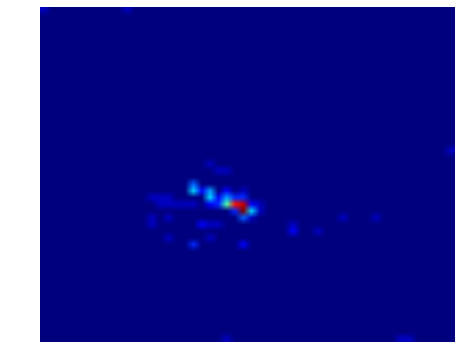

In [97]:
"""Plot heatmap with hist2d"""

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(num=None, figsize=(8, 6), dpi=120)
plt.imshow(heatmap, extent=extent)
plt.axis('off')
plt.show()


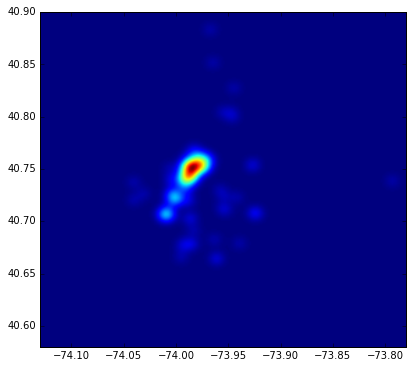

In [96]:
"""plot heatmap with gaussian filter"""

def grid_density_gaussian_filter(x0, y0, x1, y1, w, h, data, r):
    kx = (w - 1) / (x1 - x0)
    ky = (h - 1) / (y1 - y0)
    border = r
    imgw = (w + 2 * border)
    imgh = (h + 2 * border)
    img = np.zeros((imgh,imgw))
    for x, y in data:
        ix = int((x - x0) * kx) + border
        iy = int((y - y0) * ky) + border
        if 0 <= ix < imgw and 0 <= iy < imgh:
            img[iy][ix] += 1
    return ndi.gaussian_filter(img, (r,r))  ## gaussian convolution

def generate_graph(xl,yl):    
    
    # data points range
    data_ymin = min(yl)
    data_ymax = max(yl)
    data_xmin = min(xl)
    data_xmax = min(yl)
    # view area range
    view_ymin = 40.58
    view_ymax = 40.9
    view_xmin = -74.13
    view_xmax = -73.78
    # generate data
    zl = np.ones([len(x),1])

            
    # gaussian filter
    zd = grid_density_gaussian_filter(view_xmin, view_ymin, view_xmax, view_ymax, 256, 256, zip(xl, yl),4)
    plt.imshow(zd , origin='lower', extent=[view_xmin, view_xmax, view_ymin, view_ymax])
    #plt.scatter(stations_x, stations_y)

plt.figure(num=None, figsize=(8, 6), dpi=120)
generate_graph(x,y)
plt.axis('off')
plt.show()
